<a href="https://colab.research.google.com/github/bmoretz/MSDS-MachineLearning/blob/master/Assignment_04/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries & Standard Setup

In [83]:
!pip install jupyterthemes

In [0]:
%matplotlib inline

# Core
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt  # for root mean-squared error calculation

# jt themes
from jupyterthemes import jtplot

# IPython display
from IPython.display import display

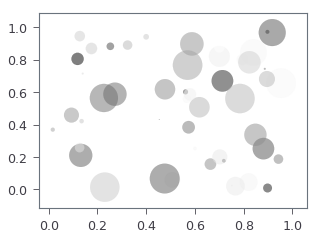

In [85]:
# Test Theme
!jt -t grade3 -f fira -fs 115
jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Looks good. Let's roll.

In [0]:
# santatize Dataset
def santatize_set( dataframe ):
    if dataframe.isnull().values.any() == True:
        cleaned = dataframe.dropna()
        print('Dropped {} invalid samples'.format(dataframe.count - cleaned.count))
        dataframe = cleaned
    return dataframe

In [0]:
# saves a plot for reporting later. 
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Dataset

In [0]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/bmoretz/MSDS-MachineLearning/master/"
DATA_PATH = "datasets"
DATA_FILE = "boston.csv"
FILE_URL = "{}/{}/{}".format(DOWNLOAD_ROOT, DATA_PATH, DATA_FILE)

# Where to save the figures
PROJECT_ROOT_DIR = "./images/"

In [0]:
boston = pd.read_csv(FILE_URL)

In [0]:
boston = santatize_set(boston)

In [0]:
boston = boston.rename( columns = {'mv' : 'median_value', 'nox' : 'air_polution', 'crim' : 'crim_rate', \
                                   'zn' : 'pct_zoned_lots', 'indus' : 'pct_industrial', 'chas' : 'is_waterfront', \
                                   'rooms' : 'avg_rooms', 'age' : 'pct_pre_war', 'dis' : 'avg_commute', \
                                   'rad' : 'highway_access', 'tax' : 'tax_rate',
                                   'ptratio' : 'pt_ratio', 'lstat' : 'pct_poor'})

In [92]:
boston.head()

,neighborhood,crim_rate,pct_zoned_lots,pct_industrial,is_waterfront,air_polution,avg_rooms,pct_pre_war,avg_commute,highway_access,tax_rate,pt_ratio,pct_poor,median_value
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [93]:
boston.tail()

,neighborhood,crim_rate,pct_zoned_lots,pct_industrial,is_waterfront,air_polution,avg_rooms,pct_pre_war,avg_commute,highway_access,tax_rate,pt_ratio,pct_poor,median_value
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [94]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood      506 non-null object
crim_rate         506 non-null float64
pct_zoned_lots    506 non-null float64
pct_industrial    506 non-null float64
is_waterfront     506 non-null int64
air_polution      506 non-null float64
avg_rooms         506 non-null float64
pct_pre_war       506 non-null float64
avg_commute       506 non-null float64
highway_access    506 non-null int64
tax_rate          506 non-null int64
pt_ratio          506 non-null float64
pct_poor          506 non-null float64
median_value      506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB


In [95]:
boston.describe()

,crim_rate,pct_zoned_lots,pct_industrial,is_waterfront,air_polution,avg_rooms,pct_pre_war,avg_commute,highway_access,tax_rate,pt_ratio,pct_poor,median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Exploratory Data Analysis

*Dataset Distributions*

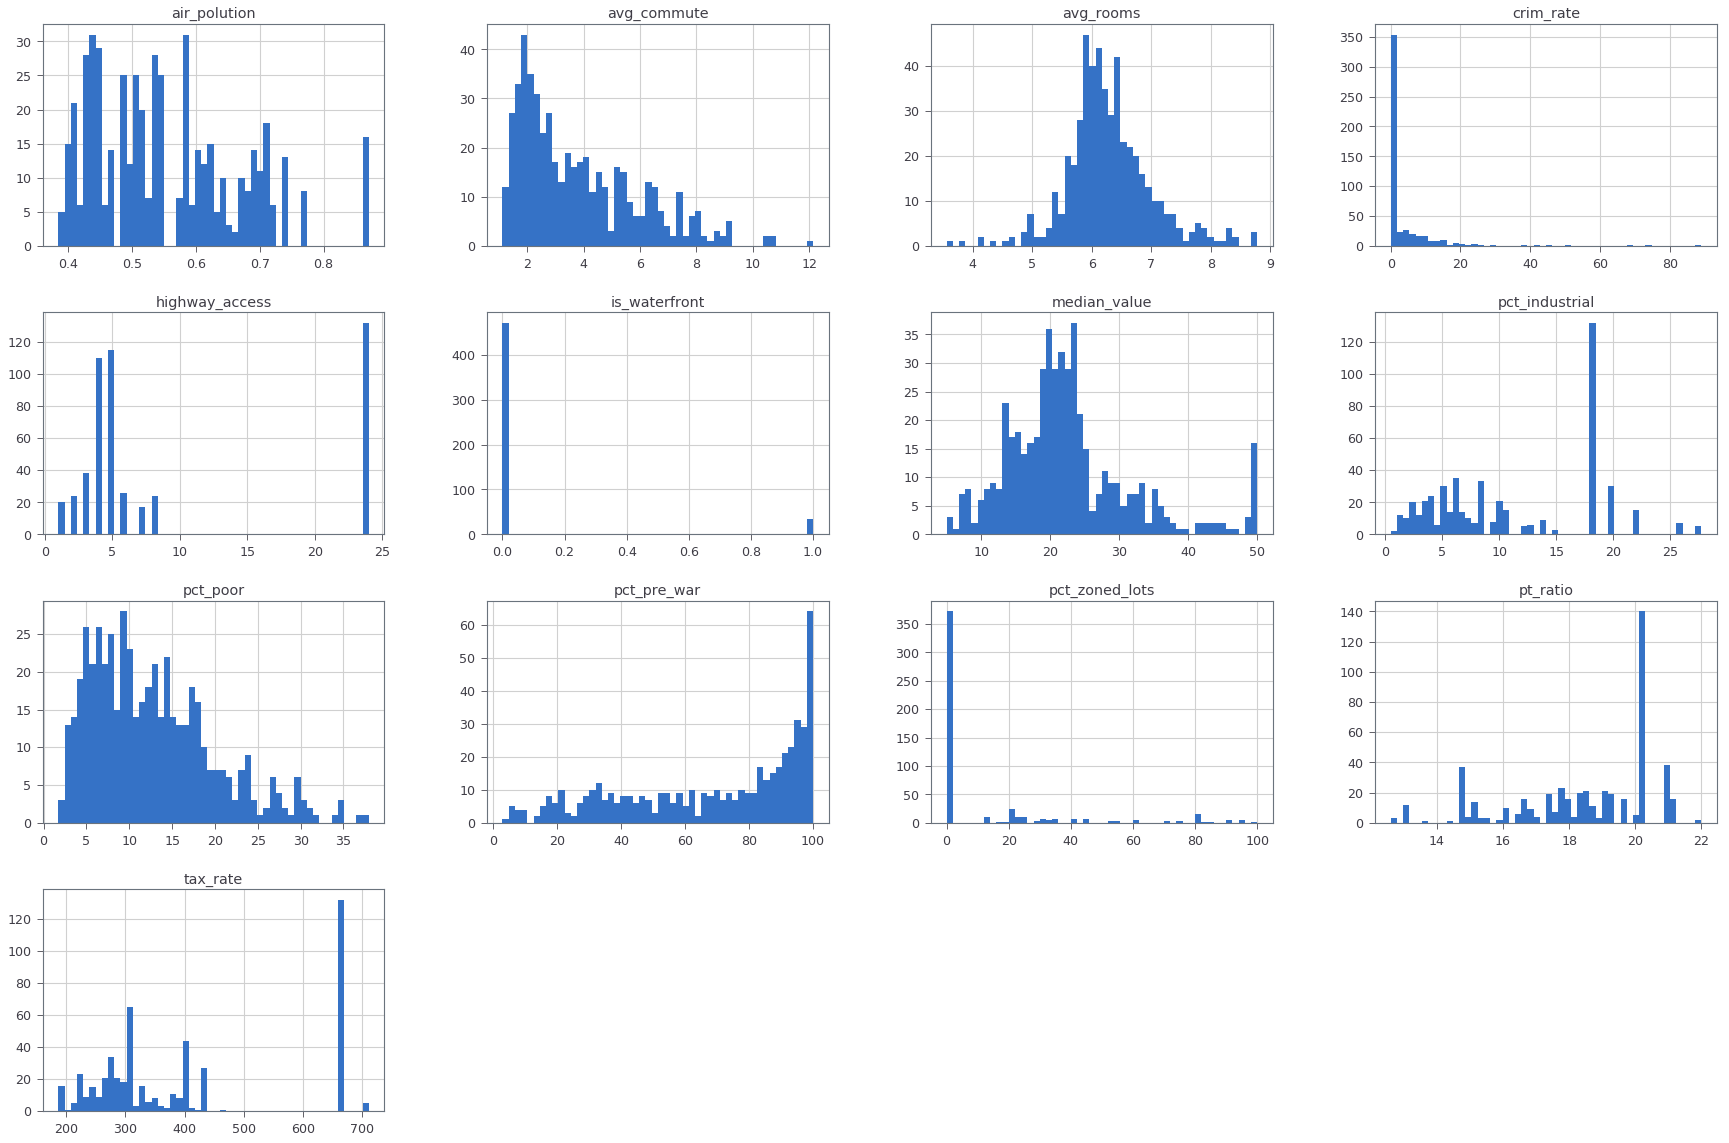

In [96]:
# Overal distributions of the variables
boston.hist( bins = 50, figsize = (30, 20)); plt.show()

*Basic Correlation Matrix*

In [97]:
corr_matrix = boston.corr()
corr_matrix["median_value"].sort_values(ascending=False)

median_value      1.000000
avg_rooms         0.696304
pct_zoned_lots    0.360386
avg_commute       0.249315
is_waterfront     0.175663
pct_pre_war      -0.377999
highway_access   -0.384766
crim_rate        -0.389582
air_polution     -0.429300
tax_rate         -0.471979
pct_industrial   -0.484754
pt_ratio         -0.505655
pct_poor         -0.740836
Name: median_value, dtype: float64

*Scatter Plot Matrix of Continious Variabls*

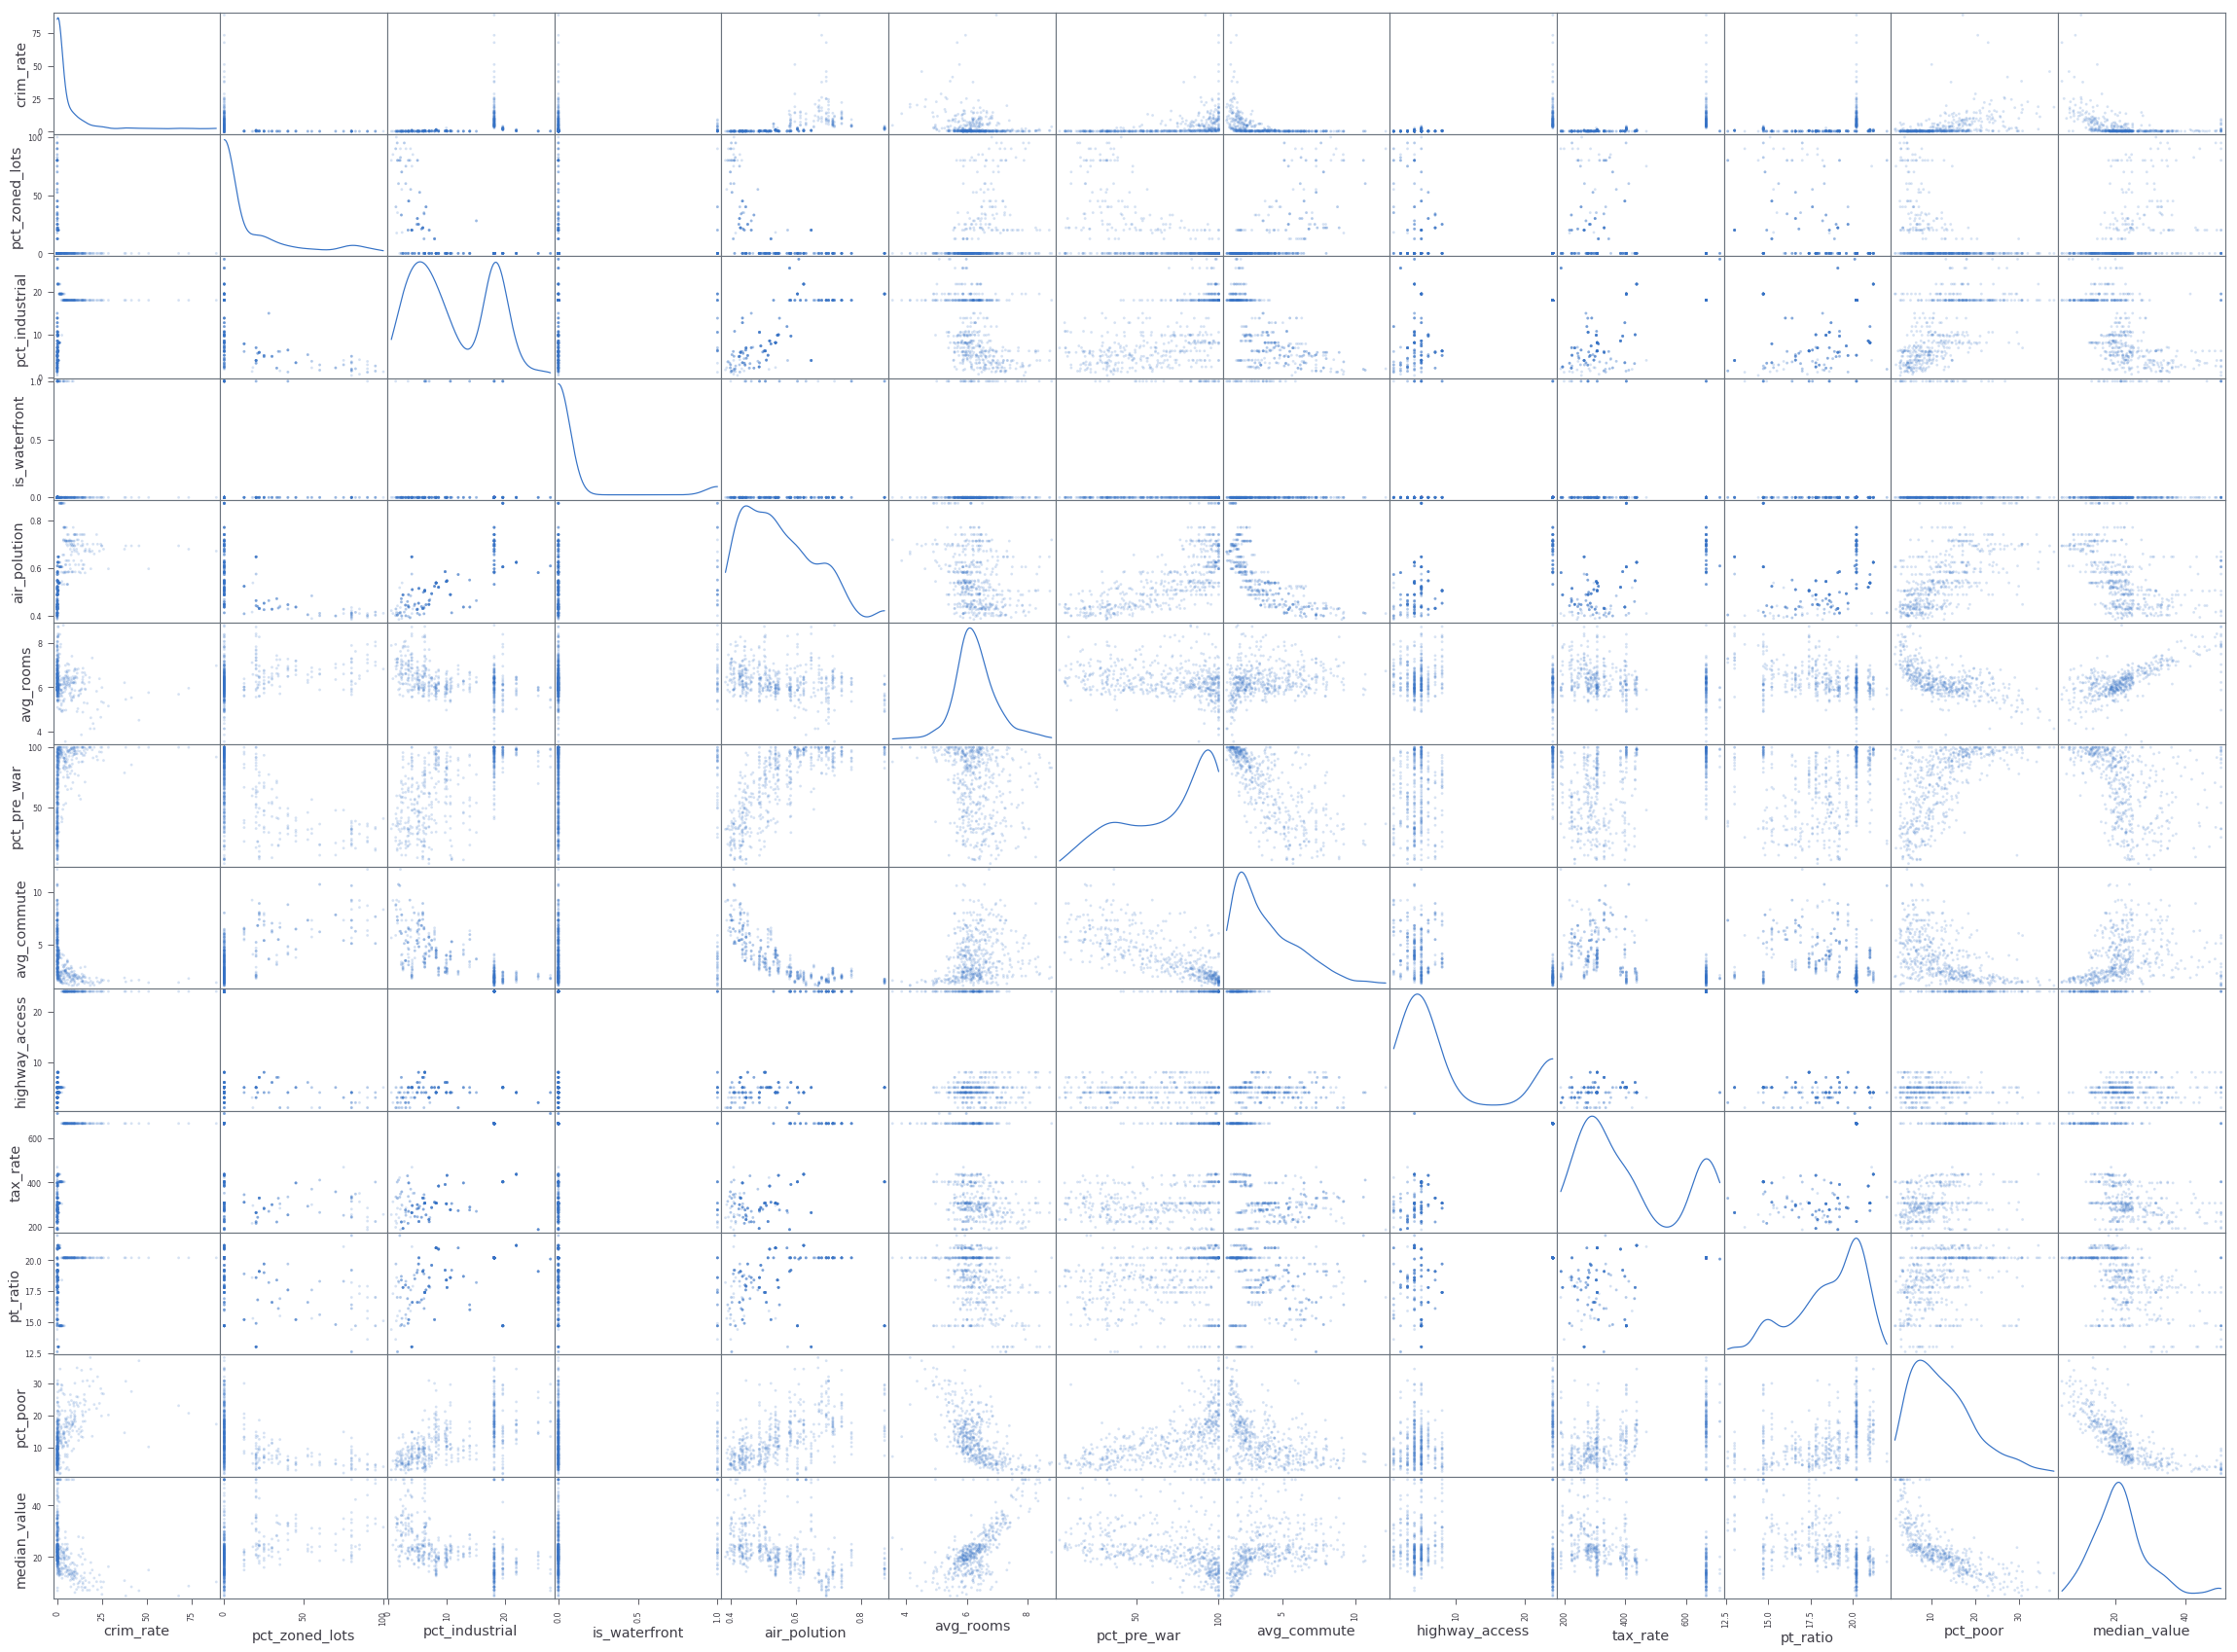

In [98]:
from pandas.plotting import scatter_matrix
# this is just to get a high-level sense of the data we're working with.
# Also, serves as a visual reference to refer back to later in the study.
scatter_matrix(boston, alpha = 0.2, figsize = (40, 30), diagonal = 'kde'); plt.show()

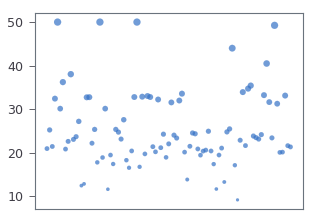

In [99]:
jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
by_neighborhood = boston.groupby('neighborhood')['median_value'].mean()
plt.scatter(by_neighborhood.index, by_neighborhood, s = by_neighborhood, alpha=0.7)
plt.xticks([])
plt.show()

# Model Setup

Set up preliminary data for data for fitting the models.

1. The first column is the median housing value response
2. The remaining columns are the explanatory variables
3. Scale the data approprately with a Standard Scaler (we'll build a full transform pipeline, but only use the numeric for now)
4. Split the data into Train and Test sets

*`Model State Globals`*

In [0]:
# We're not interested in the Neighborhood column in the model.
if 'neighborhood' in boston:
  boston = boston.drop(columns = ['neighborhood'])

In [0]:
RANDOM_SEED = 1
SET_FIT_INTERCEPT = True
TEST_SIZE = .1

In [0]:
# Learning Libraries
import sklearn.linear_model

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # Models
from sklearn.preprocessing import StandardScaler # Standard Numeric Scaler
from sklearn.pipeline import Pipeline, FeatureUnion # Features
from sklearn.model_selection import KFold, GridSearchCV, train_test_split  # cross-validation / feature tuning
from sklearn.metrics import mean_squared_error, r2_score # Performance Measurement
from sklearn.model_selection import cross_val_predict # Cross-validation
from sklearn.metrics import confusion_matrix # confusion matrix

In [0]:
label = 'median_value'
features = boston.columns.values[boston.columns != label]
samples = boston.shape[0]

In [0]:
# Numeric Transform Pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [0]:
# Full data processing pipeline
full_pipeline = FeatureUnion( transformer_list = [
    ("num_pipeline", num_pipeline)
])

In [0]:
# transformed Model & Response data
X = boston.iloc[:, 0:11].values
y = boston.iloc[:, 11].values

In [0]:
# only scale our input values, leave the response out.
model_prepared = full_pipeline.fit_transform(X)

In [0]:
test_size = round(samples * TEST_SIZE)

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(model_prepared, y, test_size= test_size, random_state=0)

In [0]:
def get_performance(model_name, model, X_test, y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  score = model.score(X_test, y_test)
  
  return mse, rmse, score

In [0]:
def fit_pred( model, X_train, y_train, X_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plt.scatter(y_test, y_pred); plt.show()
  return y_pred

In [0]:
def display_scores(perf_sum):  
  display('{} Performance Summary'.format(perf_sum['Regressor']))
  display('Score: {:.4}'.format(perf_sum['Score']))
  display('Mean-Squared Error : {:.4}'.format(perf_sum['MSE']))
  display('Root Mean-Squared Error : {:.4}'.format(perf_sum['RMSE']))

In [0]:
perf_cols = ['Regressor', 'Score', 'MSE', 'RMSE']
perf_summary = pd.DataFrame(columns=perf_cols)

# Linear

In [0]:
lin_reg = LinearRegression(fit_intercept = SET_FIT_INTERCEPT)

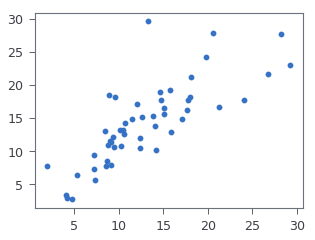

In [115]:
lin_pred = fit_pred(lin_reg, X_train, y_train, X_test)

In [0]:
lm_mse, lm_rmse, lm_score = get_performance('Linear', lin_reg, X_test, y_test, lin_pred)

In [117]:
lm_perf = pd.DataFrame(['Linear', lm_mse, lm_rmse, lm_score]).T
lm_perf.columns = perf_cols

lm_perf

,Regressor,Score,MSE,RMSE
0,Linear,17.4389,4.17599,0.519423


In [0]:
perf_summary = perf_summary.append(lm_perf)

# Ridge

In [0]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky',
                fit_intercept = SET_FIT_INTERCEPT,
                normalize = False,
                random_state = RANDOM_SEED)

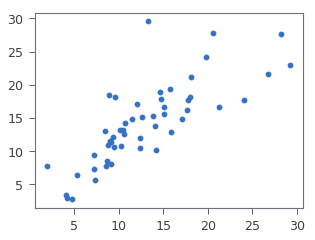

In [120]:
ridge_pred = fit_pred(ridge_reg, X_train, y_train, X_test)

In [0]:
rr_mse, rr_rmse, rr_score = get_performance('Ridge', ridge_reg, X_test, y_test, ridge_pred)

In [122]:
rr_perf = pd.DataFrame(['Ridge', rr_mse, rr_rmse, rr_score]).T
rr_perf.columns = perf_cols

rr_perf

,Regressor,Score,MSE,RMSE
0,Ridge,17.4086,4.17236,0.520258


In [0]:
perf_summary = perf_summary.append(rr_perf)

# Lasso

In [0]:
lasso_reg = Lasso(alpha = 0.1, max_iter=10000, tol=0.01,
                fit_intercept = SET_FIT_INTERCEPT,
                random_state = RANDOM_SEED)

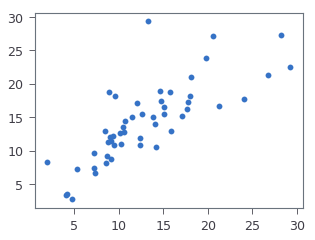

In [125]:
lasso_pred = fit_pred(lasso_reg, X_train, y_train, X_test)

In [0]:
la_mse, la_rmse, la_score = get_performance('Lasso', lasso_reg, X_test, y_test, lasso_pred)

In [127]:
la_perf = pd.DataFrame(['Lasso', la_mse, la_rmse, la_score]).T
la_perf.columns = perf_cols

la_perf

,Regressor,Score,MSE,RMSE
0,Lasso,17.4283,4.17472,0.519715


In [0]:
perf_summary = perf_summary.append(la_perf)

# Elastic Net

In [0]:
en_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5,
                max_iter=10000, tol=0.01,
                fit_intercept = SET_FIT_INTERCEPT,
                normalize = False,
                random_state = RANDOM_SEED)

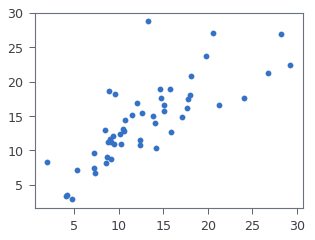

In [130]:
en_pred = fit_pred(en_reg, X_train, y_train, X_test)

In [0]:
en_mse, en_rmse, en_score = get_performance('Elastic Net', en_reg, X_test, y_test, en_pred)

In [132]:
en_perf = pd.DataFrame(['Elastic Net', en_mse, en_rmse, en_score]).T
en_perf.columns = perf_cols

en_perf

,Regressor,Score,MSE,RMSE
0,Elastic Net,16.9186,4.11322,0.533761


In [0]:
perf_summary = perf_summary.append(en_perf)

# Tree Based Methods

`Tree based models in SciKit Learn`

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

`For the Tree based algorithms we need to reset our training data to be in its natual form, i.e., unscaled.`

In [0]:
X = boston.iloc[:, 0:11]
y = boston.iloc[:, 12]

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=0) # new set of training data, unscaled

In [0]:
features = X.columns.values

In [0]:
def display_feature_importance(rf_reg):
  importances = rf_reg.feature_importances_
  std = np.std([rf_reg.feature_importances_ for tree in rf_reg.estimators_],
               axis=0)
  indices = np.argsort(importances)[::-1]

  # Print the feature ranking
  print("Feature ranking:")
  
  feats = []
  for f in range(X.shape[1]):
      print( features[indices[f]], ", F[%d] (%f)" % (f + 1, importances[indices[f]]))
      feats.append(features[indices[f]])
      
  # Plot the feature importances of the forest
  plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
         color="r", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), feats)
  plt.xlim([-1, X.shape[1]])
  plt.xticks(rotation='vertical')
  plt.show()
 

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10, max_features = 5, random_state=0)

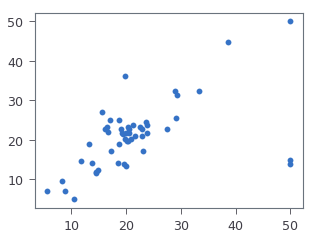

In [140]:
dt_pred = fit_pred(tree_reg, X_train, y_train, X_test)

In [0]:
dt_mse, dt_rmse, dt_score = get_performance('Decision Tree', tree_reg, X_test, y_test, dt_pred)

In [142]:
dt_perf = pd.DataFrame(['Decision Tree', dt_mse, dt_rmse, dt_score]).T
dt_perf.columns = perf_cols

dt_perf

,Regressor,Score,MSE,RMSE
0,Decision Tree,69.1402,8.31506,0.196269


In [0]:
perf_summary = perf_summary.append(dt_perf)

# Random Forest

In [0]:
rf_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0, bootstrap = True)

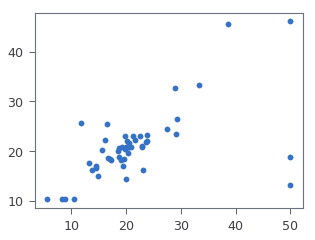

In [145]:
rf_pred = fit_pred(rf_reg, X_train, y_train, X_test)

In [0]:
rf_mse, rf_rmse, rf_score = get_performance('Random Forest', rf_reg, X_test, y_test, rf_pred)

In [147]:
rf_perf = pd.DataFrame(['Random Forest', rf_mse, rf_rmse, rf_score]).T
rf_perf.columns = perf_cols

rf_perf

,Regressor,Score,MSE,RMSE
0,Random Forest,58.493,7.64807,0.320039


In [0]:
perf_summary = perf_summary.append(rf_perf)

Feature ranking:
avg_rooms , F[1] (0.698326)
crim_rate , F[2] (0.126189)
air_polution , F[3] (0.058990)
avg_commute , F[4] (0.041645)
pct_pre_war , F[5] (0.029596)
pt_ratio , F[6] (0.026535)
tax_rate , F[7] (0.010751)
pct_industrial , F[8] (0.003826)
highway_access , F[9] (0.002697)
is_waterfront , F[10] (0.001315)
pct_zoned_lots , F[11] (0.000130)


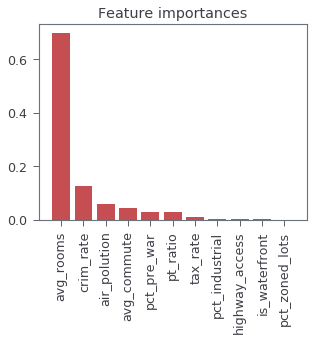

In [149]:
display_feature_importance(rf_reg)

In [150]:
features

array(['crim_rate', 'pct_zoned_lots', 'pct_industrial', 'is_waterfront',
       'air_polution', 'avg_rooms', 'pct_pre_war', 'avg_commute',
       'highway_access', 'tax_rate', 'pt_ratio'], dtype=object)

# Summary

In [0]:
perf_summary.set_index("Regressor", drop=True, inplace=True)

In [152]:
perf_summary.sort_values(by=['RMSE'])

,Score,MSE,RMSE
Regressor,,,
Decision Tree,69.1402,8.31506,0.196269
Random Forest,58.493,7.64807,0.320039
Linear,17.4389,4.17599,0.519423
Lasso,17.4283,4.17472,0.519715
Ridge,17.4086,4.17236,0.520258
Elastic Net,16.9186,4.11322,0.533761


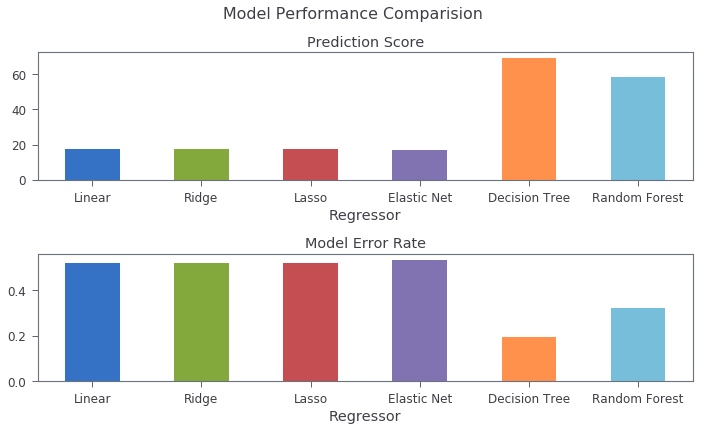

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Model Performance Comparision', y = 1.025)
fig.subplots_adjust(top=4)

plt.subplot(311)
perf_summary['Score'].plot(kind='bar', title ="Prediction Score", figsize=(10, 8), fontsize=12)
plt.xticks(rotation='horizontal')

plt.subplot(312)
perf_summary['RMSE'].plot(kind='bar', title ="Model Error Rate", figsize=(10, 8), fontsize=12)
plt.xticks(rotation='horizontal')

fig.tight_layout()
plt.show()

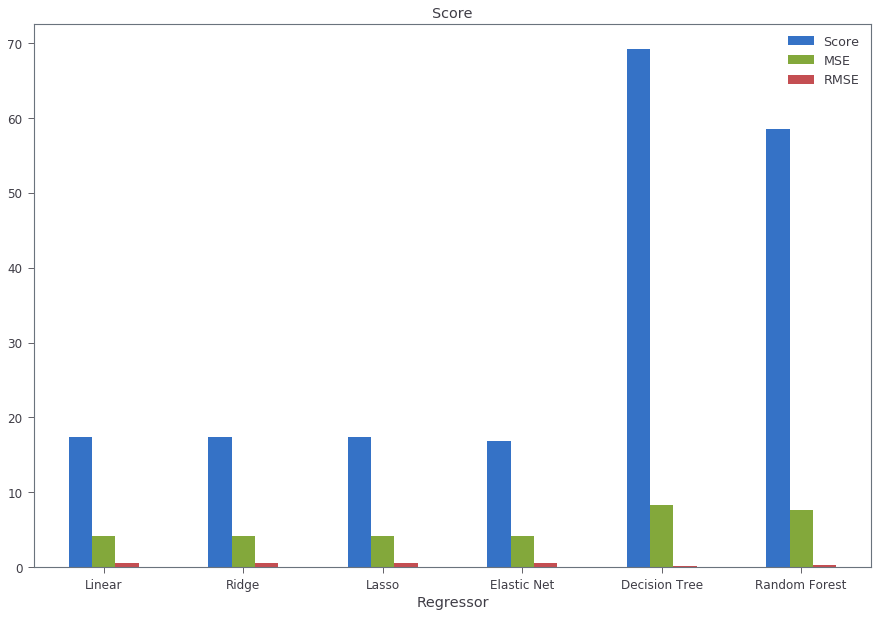

In [154]:
perf_summary.plot(kind='bar', title ="Score", figsize=(15, 10), fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()